<a href="https://colab.research.google.com/github/DC-NX-74205/Dinosaurs/blob/main/FastAILesson2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 5.5 MB/s 
     |████████████████████████████████| 48 kB 1.7 MB/s 
     |████████████████████████████████| 1.2 MB 13.0 MB/s 
     |████████████████████████████████| 51 kB 246 kB/s 
     |████████████████████████████████| 561 kB 24.1 MB/s 
     |████████████████████████████████| 130 kB 21.3 MB/s 
Mounted at /content/gdrive


In [3]:
#hide
from fastbook import *

In [1]:
!pip install --upgrade git+https://github.com/fastai/fastai.git

  Cloning https://github.com/fastai/fastai.git to /tmp/pip-req-build-gtr5ab1_
  Running command git clone -q https://github.com/fastai/fastai.git /tmp/pip-req-build-gtr5ab1_
     |████████████████████████████████| 55 kB 2.3 MB/s 
  Created wheel for fastai: filename=fastai-2.5.4-py3-none-any.whl size=187526 sha256=0eabf5a598bf778da808f19c8d87f6a3ad12b1fe2a37a52e5af49726d23bb3ee
  Stored in directory: /tmp/pip-ephem-wheel-cache-zxllnb54/wheels/e2/81/30/9d0af3c5b8212ceb1118de039a8973c37f047102062f346d19
Successfully built fastai
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [4]:
key = os.environ.get('AZURE_SEARCH_KEY', 'be5aeb4d92d74fcf86ed308ce39df05a')

In [5]:
# +
!pip install azure-cognitiveservices-search-imagesearch

from azure.cognitiveservices.search.imagesearch import ImageSearchClient as api
from msrest.authentication import CognitiveServicesCredentials as auth

     |████████████████████████████████| 46 kB 2.4 MB/s 
     |████████████████████████████████| 40 kB 5.0 MB/s 
     |████████████████████████████████| 85 kB 2.3 MB/s 
     |████████████████████████████████| 41 kB 596 kB/s 
     |████████████████████████████████| 55 kB 3.7 MB/s 
     |████████████████████████████████| 3.6 MB 44.4 MB/s 


In [6]:
search_images_bing

<function fastbook.search_images_bing>

In [7]:
results = search_images_bing(key, 'dinosaurs')
ims = results.attrgot('content_url')
len(ims)

150

In [8]:
dinosaur_types = 'trex','triceratops','stegosaurus'
path = Path('dinosaurs')

In [9]:
if not path.exists():
    path.mkdir()
    for trex in dinosaur_types:
        dest = (path/trex)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{trex} dinosaurs')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [10]:
if not path.exists():
    path.mkdir()
    for triceratops in dinosaur_types:
        dest = (path/triceratops)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{triceratops} dinosaurs')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [11]:
if not path.exists():
    path.mkdir()
    for stegosaurus in dinosaurs_types:
        dest = (path/stegosaurus)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{stegosaurus} dinosaurs')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [12]:
fns = get_image_files(path)
fns

(#437) [Path('dinosaurs/trex/00000039.jpg'),Path('dinosaurs/trex/00000113.jpg'),Path('dinosaurs/trex/00000004.jpg'),Path('dinosaurs/trex/00000045.jpg'),Path('dinosaurs/trex/00000139.jpg'),Path('dinosaurs/trex/00000047.jpeg'),Path('dinosaurs/trex/00000022.jpg'),Path('dinosaurs/trex/00000100.jpg'),Path('dinosaurs/trex/00000132.jpg'),Path('dinosaurs/trex/00000103.jpg')...]

In [13]:
failed = verify_images(fns)
failed

(#5) [Path('dinosaurs/trex/00000004.jpg'),Path('dinosaurs/trex/00000134.png'),Path('dinosaurs/trex/00000015.jpg'),Path('dinosaurs/trex/00000007.jpg'),Path('dinosaurs/trex/00000118.jpg')]

In [14]:
failed.map(Path.unlink);

In [15]:
dinosaurs = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [16]:
dls = dinosaurs.dataloaders(path)

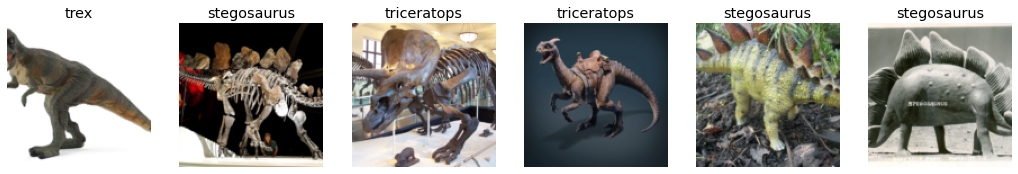

In [17]:
dls.valid.show_batch(max_n=6, nrows=1)

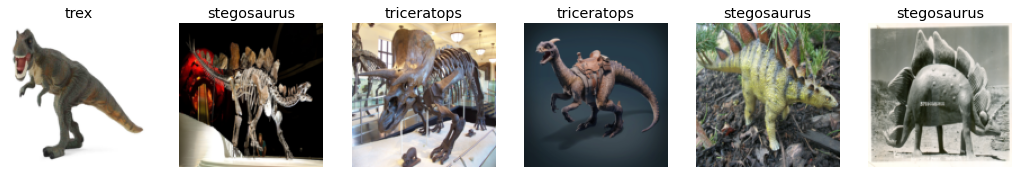

In [18]:
dinosaurs = dinosaurs.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = dinosaurs.dataloaders(path)
dls.valid.show_batch(max_n=6, nrows=1)

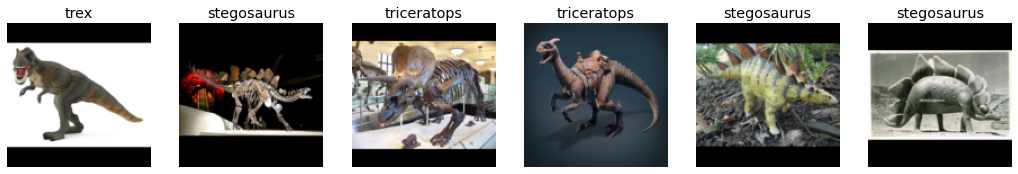

In [19]:
dinosaurs = dinosaurs.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = dinosaurs.dataloaders(path)
dls.valid.show_batch(max_n=6, nrows=1)

In [20]:
dinosaurs = dinosaurs.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = dinosaurs.dataloaders(path)

In [21]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


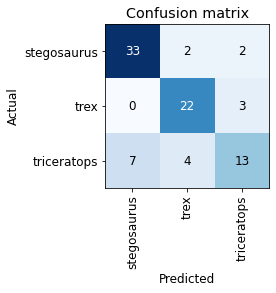

In [22]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

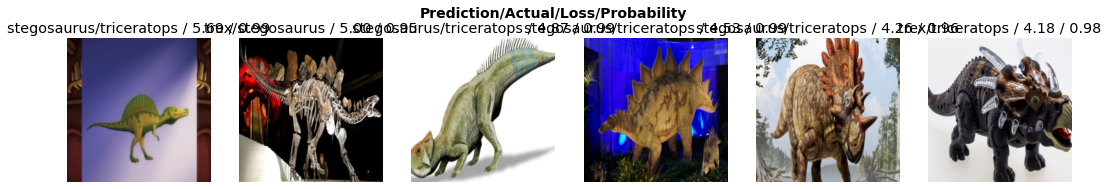

In [23]:
interp.plot_top_losses(6, nrows=1)

In [24]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [25]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [26]:
#hide
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,trex in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/trex)
# for idx,stegosaurus in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/stegosaurus)

In [27]:
learn.export()

In [28]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [29]:
learn_inf = load_learner(path/'export.pkl')

In [38]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

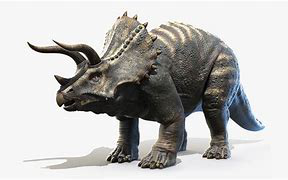

In [39]:
img = PILImage.create(uploader.data[0])
img

In [40]:
img = PILImage.create(uploader.data[0])
is_triceratops,_,probs = learn.predict(img)
print(f"Is this a triceratops?: {is_triceratops}.")
print(f"Probability it's a triceratops: {probs[1].item():.6f}")

Is this a triceratops?: triceratops.
Probability it's a triceratops: 0.024007


In [30]:
learn_inf.predict('dinosaurs/triceratops/00000097.jpg')

('triceratops',
 TensorBase(2),
 TensorBase([4.0964e-04, 2.4617e-01, 7.5342e-01]))

In [31]:
learn_inf.dls.vocab

['stegosaurus', 'trex', 'triceratops']

In [34]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [35]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [41]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [42]:
pred,pred_idx,probs = learn_inf.predict(img)

In [43]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: triceratops; Probability: 0.6905')

In [44]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [45]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [50]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [51]:
#hide_output
VBox([widgets.Label('Select your Dinosaur!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [52]:
#hide
# !pip install voila
# !colab serverextension enable --sys-prefix voila 